In [14]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

In [10]:
#Cargar dataset
data = pd.read_csv('Datase_ML.csv', encoding="utf-8")

In [11]:
df = data.drop(columns=['length', 'cleaned_resume'])

In [12]:
df

,Category,Resume,cleaned_Resume
0,Blockchain,"SOFTWARE SKILLS: Languages: C, C++ & java Oper...",SOFTWARE SKILLS Languages C C java Operating S...
1,Blockchain,Skills Strong CS fundamentals and problem solv...,Skills Strong CS fundamentals and problem solv...
2,Blockchain,Hobbies â¢ Playing Chess â¢ Solving Rubik's ...,Hobbies Playing Chess Solving Rubik s Cube Wat...
3,Blockchain,Skills Strong CS fundamentals and problem solv...,Skills Strong CS fundamentals and problem solv...
4,Blockchain,"SKILLS Bitcoin, Ethereum Solidity Hyperledger,...",SKILLS Bitcoin Ethereum Solidity Hyperledger B...
...,...,...,...
7758,Web Developer,UI Developer UI span lDeveloperspan UI Develop...,UI Developer UI span lDeveloperspan UI Develop...
7759,Web Developer,QA Engineer QA Engineer QA Engineer Muskian In...,QA Engineer QA Engineer QA Engineer Muskian In...
7760,Web Developer,Network Engineer span lNetworkspan Engineer Se...,Network Engineer span lNetworkspan Engineer Se...
7761,Web Developer,PHP Developer PHP span lDeveloperspan LAMP PHP...,PHP Developer PHP span lDeveloperspan LAMP PHP...


In [13]:
print(df.groupby('Category')['cleaned_Resume'].count())

Category
Blockchain                    580
Data Science                  440
Database                      429
DevOps Engineer               715
DotNet Developer              364
Information Technology        120
Java Developer               1200
Network Security Engineer     325
Python Developer             1200
Testing                      1190
Web Developer                1200
Name: cleaned_Resume, dtype: int64


In [23]:
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_19148\2955146718.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Category", data=df, palette='Reds')


<Axes: xlabel='count', ylabel='Category'>

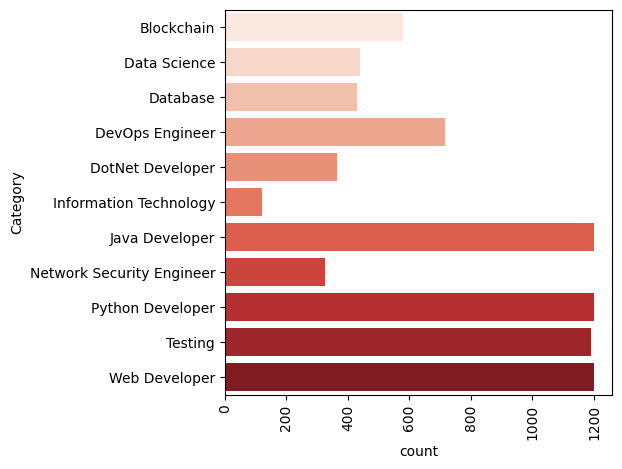

In [24]:
plt.figure(figsize=(5,5))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=df, palette='Reds')

In [65]:
import re

def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText)
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\]'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\]'
<>:10: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_19148\2045684286.py:4: SyntaxWarning: invalid escape sequence '\S'
  resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_19148\2045684286.py:6: SyntaxWarning: invalid escape sequence '\S'
  resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_19148\2045684286.py:7: SyntaxWarning: invalid escape sequence '\S'
  resumeText = re.sub('@\S+',

In [26]:
resumeDataSet = df.copy()
resumeDataSet.head()

,Category,Resume,cleaned_Resume
0,Blockchain,"SOFTWARE SKILLS: Languages: C, C++ & java Oper...",SOFTWARE SKILLS Languages C C java Operating S...
1,Blockchain,Skills Strong CS fundamentals and problem solv...,Skills Strong CS fundamentals and problem solv...
2,Blockchain,Hobbies â¢ Playing Chess â¢ Solving Rubik's ...,Hobbies Playing Chess Solving Rubik s Cube Wat...
3,Blockchain,Skills Strong CS fundamentals and problem solv...,Skills Strong CS fundamentals and problem solv...
4,Blockchain,"SKILLS Bitcoin, Ethereum Solidity Hyperledger,...",SKILLS Bitcoin Ethereum Solidity Hyperledger B...


In [27]:
var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resumeDataSet[i] = le.fit_transform(resumeDataSet[i])

In [28]:
resumeDataSet.head()

,Category,Resume,cleaned_Resume
0,0,"SOFTWARE SKILLS: Languages: C, C++ & java Oper...",SOFTWARE SKILLS Languages C C java Operating S...
1,0,Skills Strong CS fundamentals and problem solv...,Skills Strong CS fundamentals and problem solv...
2,0,Hobbies â¢ Playing Chess â¢ Solving Rubik's ...,Hobbies Playing Chess Solving Rubik s Cube Wat...
3,0,Skills Strong CS fundamentals and problem solv...,Skills Strong CS fundamentals and problem solv...
4,0,"SKILLS Bitcoin, Ethereum Solidity Hyperledger,...",SKILLS Bitcoin Ethereum Solidity Hyperledger B...


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
requiredText = resumeDataSet['cleaned_Resume'].values
requiredTarget = resumeDataSet['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=0, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

Feature completed .....
(6210, 1500)
(1553, 1500)


In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [33]:
clf = KNeighborsClassifier(n_neighbors=15)
clf = clf.fit(X_train, y_train)
yp = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of KNeighbors Classifier on training set: 0.93
Accuracy of KNeighbors Classifier on test set: 0.91


In [36]:
from sklearn.metrics import classification_report

# Genera el reporte de clasificación
report = classification_report(y_test, yp)

print("Reporte de clasificación:")
print(report)

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       130
           1       1.00      1.00      1.00        78
           2       0.96      1.00      0.98        74
           3       0.99      1.00      1.00       146
           4       1.00      1.00      1.00        71
           5       0.94      0.88      0.91        34
           6       0.80      0.81      0.80       241
           7       0.98      1.00      0.99        63
           8       0.83      0.76      0.79       249
           9       1.00      1.00      1.00       230
          10       0.80      0.86      0.83       237

    accuracy                           0.91      1553
   macro avg       0.94      0.94      0.94      1553
weighted avg       0.91      0.91      0.91      1553



In [37]:
from sklearn.metrics import confusion_matrix

# Calcula la matriz de confusión
conf_matrix = confusion_matrix(y_test, yp)

print("Matriz de Confusión:")
print(conf_matrix)


Matriz de Confusión:
[[130   0   0   0   0   0   0   0   0   0   0]
 [  0  78   0   0   0   0   0   0   0   0   0]
 [  0   0  74   0   0   0   0   0   0   0   0]
 [  0   0   0 146   0   0   0   0   0   0   0]
 [  0   0   0   0  71   0   0   0   0   0   0]
 [  0   0   0   0   0  30   0   0   0   0   4]
 [  0   0   0   0   0   1 195   1  22   0  22]
 [  0   0   0   0   0   0   0  63   0   0   0]
 [  0   0   2   1   0   0  34   0 188   0  24]
 [  0   0   0   0   0   0   0   0   0 230   0]
 [  0   0   1   0   0   1  15   0  17   0 203]]


In [34]:
class JobPredictor:
    def __init__(self) -> None:
        self.le = le
        self.word_vectorizer = word_vectorizer
        self.clf = clf

    def predict(self, resume):
        feature = self.word_vectorizer.transform([resume])
        predicted = self.clf.predict(feature)
        resume_position = self.le.inverse_transform(predicted)[0]
        return resume_position

    def predict_proba(self, resume):
        feature = self.word_vectorizer.transform([resume])
        predicted_prob = self.clf.predict_proba(feature)
        return predicted_prob[0]

# **Validaciones reales**

In [42]:
job_description = """
Skills Required:

Proficiency in statistical analysis, machine learning, and data mining techniques
Strong programming skills in Python or R for data analysis and model development
Experience with data manipulation and transformation using SQL and/or NoSQL databases
Knowledge of data visualization libraries such as Matplotlib, Seaborn, or Plotly
Familiarity with distributed computing frameworks like Apache Spark for big data processing
Understanding of cloud platforms such as AWS, Azure, or Google Cloud for data storage and computing
Ability to communicate complex findings and insights to both technical and non-technical stakeholders
Experience with version control systems like Git for collaborative development
Strong problem-solving skills and attention to detail
Background in mathematics, statistics, computer science, or a related field
Roles & Responsibilities:

Serve as a subject matter expert in statistical analysis and machine learning techniques
Collaborate with cross-functional teams including data engineers, business analysts, and domain experts to identify and solve complex business problems
Design, develop, and deploy machine learning models to extract actionable insights from large datasets
Conduct exploratory data analysis to uncover patterns, trends, and correlations in the data
Evaluate model performance and iterate on algorithms to improve accuracy and efficiency
Create data visualizations and interactive dashboards to communicate findings and drive decision-making
Stay current with emerging technologies and industry trends in data science and machine learning
Mentor and provide guidance to junior data scientists and analysts
Participate in code reviews, team meetings, and knowledge-sharing sessions
Adapt to changing priorities and manage multiple projects simultaneously
"""

In [43]:
resume_position = JobPredictor().predict(job_description)
f'JD uploaded! Position: {resume_position}'

'JD uploaded! Position: Data Science'

In [72]:
job_description = """
Skills Required:

Proficient in C# and .NET framework for application development
Strong understanding of object-oriented programming principles
Experience with ASP.NET MVC or ASP.NET Core for web development
Familiarity with front-end technologies such as HTML, CSS, and JavaScript
Knowledge of relational databases like SQL Server or MySQL
Experience with version control systems such as Git
Understanding of software development best practices and design patterns
Ability to write clean, maintainable, and efficient code
Strong problem-solving and debugging skills
Excellent communication skills and ability to work in a team environment
Roles & Responsibilities:

Develop and maintain .NET applications using C# and related technologies
Collaborate with cross-functional teams to gather requirements and define project scope
Design and implement scalable and secure web applications
Write unit tests and conduct code reviews to ensure code quality
Troubleshoot and debug issues in existing applications
Keep up-to-date with the latest .NET technologies and industry trends
Provide technical guidance and mentorship to junior developers
Participate in Agile development processes and meetings
Communicate effectively with stakeholders to understand business requirements
Adapt to changing project requirements and deadlines
"""

In [74]:
job_description=cleanResume(job_description)
resume_position = JobPredictor().predict(job_description)
f'JD uploaded! Position: {resume_position}'

'JD uploaded! Position: Web Developer'

In [61]:
job_description = """
Skills Required:

Proficiency in HTML5, CSS3, and JavaScript for web development
Experience with responsive design techniques and frameworks like Bootstrap or Foundation
Strong understanding of user experience (UX) and user interface (UI) design principles
Knowledge of Adobe Creative Suite (Photoshop, Illustrator, XD, etc.) or other design tools
Familiarity with version control systems such as Git
Understanding of web accessibility standards and best practices
Ability to create visually appealing and intuitive website layouts
Excellent attention to detail and ability to work to tight deadlines
Strong communication skills and ability to collaborate with cross-functional teams
Understanding of SEO principles and techniques for optimizing website performance
Roles & Responsibilities:

Design visually stunning and user-friendly website layouts and interfaces
Collaborate with stakeholders to understand project requirements and objectives
Create wireframes, mockups, and prototypes to demonstrate design concepts
Implement designs using HTML, CSS, and JavaScript while ensuring cross-browser compatibility
Optimize website performance for speed and responsiveness
Conduct usability testing and gather feedback to iterate on designs
Stay updated on the latest design trends, tools, and technologies
Work closely with developers to ensure designs are implemented accurately
Communicate effectively with clients and project teams throughout the design process
Provide guidance and mentorship to junior designers or developers when needed
Contribute to design discussions and brainstorming sessions to generate new ideas
"""

In [62]:
resume_position = JobPredictor().predict(job_description)
f'JD uploaded! Position: {resume_position}'

'JD uploaded! Position: Web Developer'

In [66]:
job_description = """
Name: Maria Lopez

Profile:
Experienced Java Developer with a proven track record of designing, implementing, and maintaining Java-based applications. Possessing a solid understanding of object-oriented programming principles, design patterns, and best practices in software development. Skilled in utilizing Java frameworks such as Spring and Hibernate to build robust and scalable applications. Proficient in database management systems including MySQL and Oracle. Strong problem-solving abilities with a keen attention to detail. Excellent communication skills and ability to work collaboratively in a team environment.

Experience:

Senior Java Developer
ABC Software Solutions
January 2019 - Present
Responsibilities:

Lead the development team in designing and implementing Java-based solutions for clients.
Collaborate with cross-functional teams to gather requirements and define project scopes.
Develop and maintain RESTful APIs using Spring Boot framework.
Optimize application performance and ensure scalability.
Conduct code reviews and mentor junior developers.
Java Developer
XYZ Tech Inc.
June 2016 - December 2018
Responsibilities:

Developed and maintained enterprise-level Java applications for internal and external use.
Participated in all phases of the software development lifecycle, from requirements gathering to deployment.
Integrated third-party APIs and services into existing systems.
Troubleshooted and resolved technical issues in a timely manner.
Assisted in the training of new team members on Java development practices.
Education:
Bachelor of Science in Computer Science
University of Technology
Graduated: May 2016

Skills:

Proficient in Java programming language
Experience with Spring framework (Spring Boot, Spring MVC, Spring Security)
Familiarity with Hibernate ORM framework
Strong knowledge of database management systems (MySQL, Oracle)
Understanding of software development methodologies (Agile, Scrum)
Excellent problem-solving and analytical skills
Effective communication and teamwork abilities
"""

In [69]:
job_description=cleanResume(job_description)
resume_position = JobPredictor().predict(job_description)
f'JD uploaded! Position: {resume_position}'

'JD uploaded! Position: Python Developer'

In [70]:
job_description = """
Profile of a Python Developer
A Python developer is a software engineer who specializes in using the Python programming language to create and maintain applications. Python's versatility makes it a popular choice for web development, data analysis, machine learning, automation, and more.

Skills and Knowledge:

Technical Skills:
Strong proficiency in Python programming, including object-oriented programming (OOP) concepts.
Experience with popular Python frameworks (e.g., Django for web development, NumPy and pandas for data analysis, TensorFlow or PyTorch for machine learning).
Working knowledge of web development concepts (HTML, CSS, JavaScript) for web applications.
Understanding of version control systems (e.g., Git).
Familiarity with database technologies (e.g., SQL, relational databases).
Soft Skills:
Excellent problem-solving and analytical skills.
Ability to write clean, efficient, and well-documented code.
Strong communication and collaboration skills to work effectively with other developers and stakeholders.
Adaptability and willingness to learn new technologies and frameworks.
Responsibilities:

Develop, test, and debug Python code for various applications.
Design and implement software architecture using Python best practices.
Collaborate with other developers and designers to define application functionalities.
Write unit tests and integrate with automated testing frameworks.
Troubleshoot and resolve errors in existing Python codebases.
Stay updated on the latest Python libraries, frameworks, and security best practices.
Tools:

Python developers utilize various tools throughout the development process, some of the most common being:

Python IDEs and Code Editors: PyCharm, Visual Studio Code, Sublime Text.
Version Control Systems: Git, GitHub.
Web Development Tools: Web browsers (Chrome DevTools, Firefox Developer Tools), HTML/CSS preprocessors (e.g., Sass).
Data Analysis and Machine Learning Libraries: NumPy, pandas, TensorFlow, PyTorch.
Testing Frameworks: unittest, pytest.
Education and Certifications:

While there's no single educational path for becoming a Python developer, a bachelor's degree in computer science, software engineering, or a related field can be beneficial. However, strong programming skills and a portfolio showcasing your work experience can hold significant weight.

Several Python certifications exist, but practical experience and a strong portfolio are often valued more by employers.
"""

In [71]:
job_description=cleanResume(job_description)
resume_position = JobPredictor().predict(job_description)
f'JD uploaded! Position: {resume_position}'

'JD uploaded! Position: Data Science'